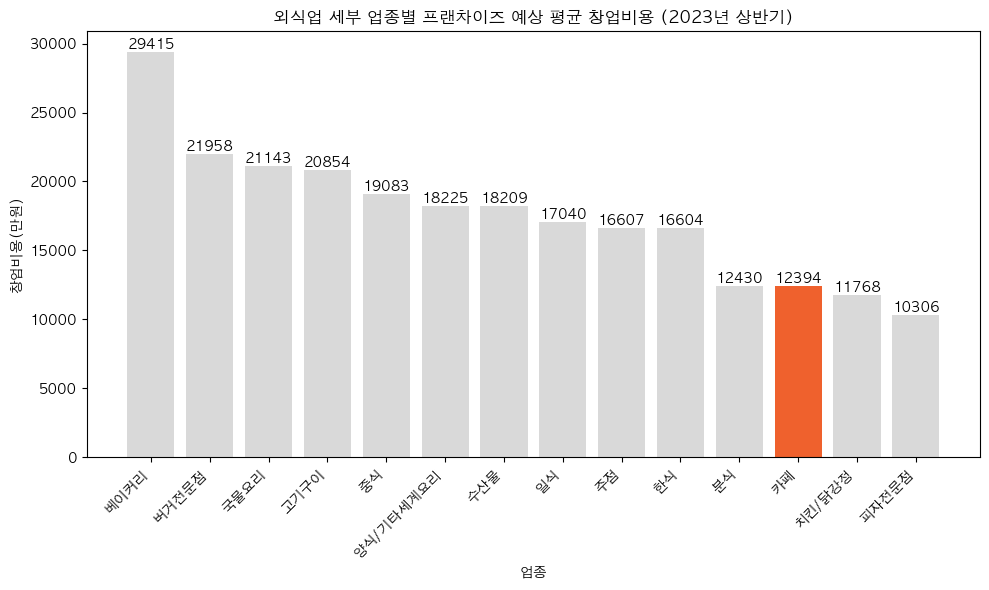

In [3]:
##### 분석배경1: 외식업 평균 창업비용
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')  # Windows의 경우 'Malgun Gothic', macOS의 경우 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 생성 (업종, 창업비용)
data = {
    '업종': ['베이커리', '버거전문점', '국물요리', '고기구이', '중식', '양식/기타세계요리', 
           '수산물', '일식', '주점', '한식', '분식', '카페', '치킨/닭강정', '피자전문점'],
    '창업비용(만원)': [29415, 21958, 21143, 20854, 19083, 18225, 18209, 17040, 16607, 
                   16604, 12430, 12394, 11768, 10306]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 색상 설정: '카페'는 #EF612D, 나머지는 #d9d9d9
colors = ['#EF612D' if 업종 == '카페' else '#d9d9d9' for 업종 in df['업종']]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(df['업종'], df['창업비용(만원)'], color=colors)  # 조건에 따른 색상 설정
plt.xticks(rotation=45, ha='right')  # x축의 업종명을 45도 각도로 회전
plt.ylabel('창업비용(만원)')
plt.xlabel('업종')
plt.title('외식업 세부 업종별 프랜차이즈 예상 평균 창업비용 (2023년 상반기)')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)  # 막대 위에 수치 표시

plt.tight_layout()  # 레이아웃 조정

# 그래프를 이미지 파일로 저장 (예: 'franchise_costs_with_values.png')
# plt.savefig('c:\\semi\\franchise_costs_with_values.jpg', dpi=300, bbox_inches='tight')

# 그래프 보여주기
plt.show()

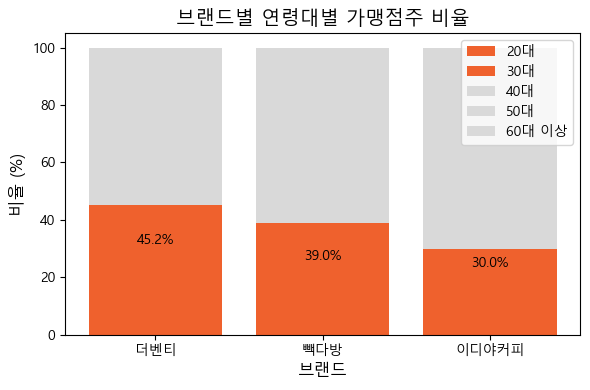

In [24]:
##### 분석배경2: 더벤티, 빽다방, 이디야 커피 점주 연령대
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 더벤티, 빽다방, 이디야커피의 연령대별 가맹점주 비율 데이터
data = {
    '연령대': ['20대', '30대', '40대', '50대', '60대 이상'],
    '더벤티': [16.1, 29.1, 31.5, 18.8, 4.5],
    '빽다방': [11, 28, 32, 23, 6],
    '이디야커피': [15, 15, 20, 20, 30]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 그래프 색상 설정 (20대, 30대는 주황색, 나머지는 회색)
colors = ['#EF612D', '#EF612D', '#d9d9d9', '#d9d9d9', '#d9d9d9']

# 그래프 그리기
plt.figure(figsize=(6, 4))

# 브랜드 목록
brands = ['더벤티', '빽다방', '이디야커피']

# 각 연령대별로 누적 막대그래프 그리기
plt.bar(brands, df.loc[0, brands], label='20대', color='#EF612D')
plt.bar(brands, df.loc[1, brands], bottom=df.loc[0, brands], label='30대', color='#EF612D')
plt.bar(brands, df.loc[2, brands], bottom=df.loc[0, brands] + df.loc[1, brands], label='40대', color='#d9d9d9')
plt.bar(brands, df.loc[3, brands], bottom=df.loc[0, brands] + df.loc[1, brands] + df.loc[2, brands], label='50대', color='#d9d9d9')
plt.bar(brands, df.loc[4, brands], bottom=df.loc[0, brands] + df.loc[1, brands] + df.loc[2, brands] + df.loc[3, brands], label='60대 이상', color='#d9d9d9')

# 20대 + 30대 합산 퍼센트 계산 및 표시
for i, brand in enumerate(brands):
    sum_20_30 = df.loc[0, brand] + df.loc[1, brand]  # 20대 + 30대 합
    plt.text(i, df.loc[0, brand] + df.loc[1, brand] / 2, f'{sum_20_30:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 제목 및 레이블 설정
plt.xlabel('브랜드', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.title('브랜드별 연령대별 가맹점주 비율', fontsize=14)

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


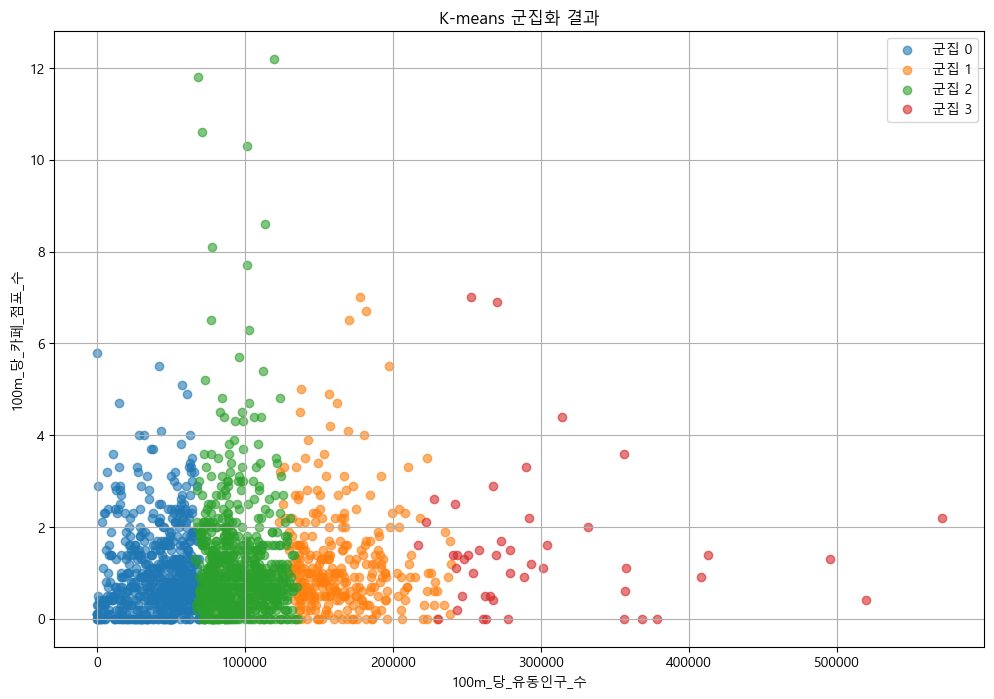

In [3]:
##### 데이터 불러오기 , K-means 
import pandas as pd

merged = pd.read_csv('c:\\data\\sang_2023_nn_de_10.csv', encoding='utf8')

########kmeans 돌리기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# 군집후 이상치 제거
merged = merged[~merged['상권_코드_명'].isin(['충정로역 7번', '신흥시장','삼성동 시장(삼성동시장)'])]

# 2. K-means++ 군집화
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# 군집화에 사용할 피처 선택
features = ['100m_당_카페_점포_수', '100m_당_프랜차이즈_점포_수', '전체 평균 임대료',
             '100m_당_상주인구_수', '100m_당_유동인구_수','100m_당_2030_유동인구_수','100m_당_집객시설_수','100m_당_직장인구_수']

# K-means 모델 학습
kmeans.fit(merged[features])

# 군집화 결과를 원본 데이터프레임에 추가
merged['군집'] = kmeans.labels_

#merged.head()

# 시각화 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우의 경우 'Malgun Gothic', 맥OS의 경우 'AppleGothic' 등

# 마이너스 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 것 방지

# 나머지 시각화 코드
plt.figure(figsize=(12, 8))

# 각 군집에 대해 다른 색상으로 점 표시
for i in range(k):
    cluster_data = merged[merged['군집'] == i]
    plt.scatter(cluster_data['100m_당_유동인구_수'], cluster_data['100m_당_카페_점포_수'], 
                label=f'군집 {i}', alpha=0.6)

plt.title('K-means 군집화 결과')
plt.xlabel('100m_당_유동인구_수')
plt.ylabel('100m_당_카페_점포_수')
plt.legend()
plt.grid()
plt.show() 

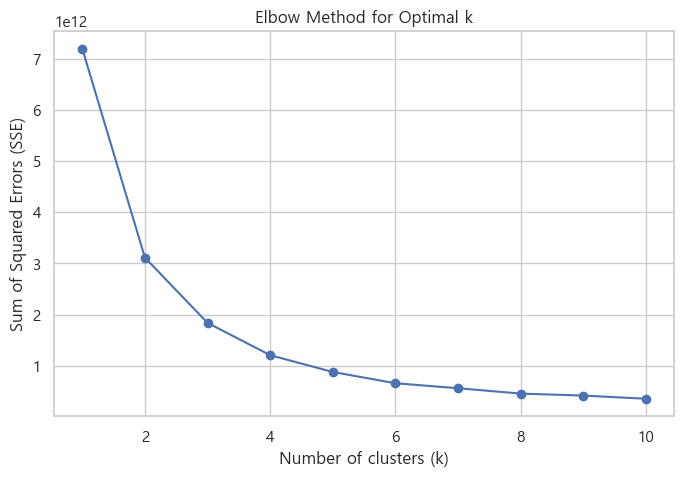

In [19]:
###### 엘보우
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 방법을 사용하여 최적의 군집 수를 찾기
sse = []
k_range = range(1, 11)  # 1부터 10까지의 k값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(merged[features])
    sse.append(kmeans.inertia_)  # inertia_는 군집 내 거리 제곱합(SSE) 값을 의미

# 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [22]:
##### 실루엣 점수
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# 실루엣 점수 계산
silhouette_avg = silhouette_score(merged[features], kmeans.labels_)
print(f'실루엣 점수: {silhouette_avg:.4f}')

실루엣 점수: 0.4104


<Figure size 1200x800 with 0 Axes>

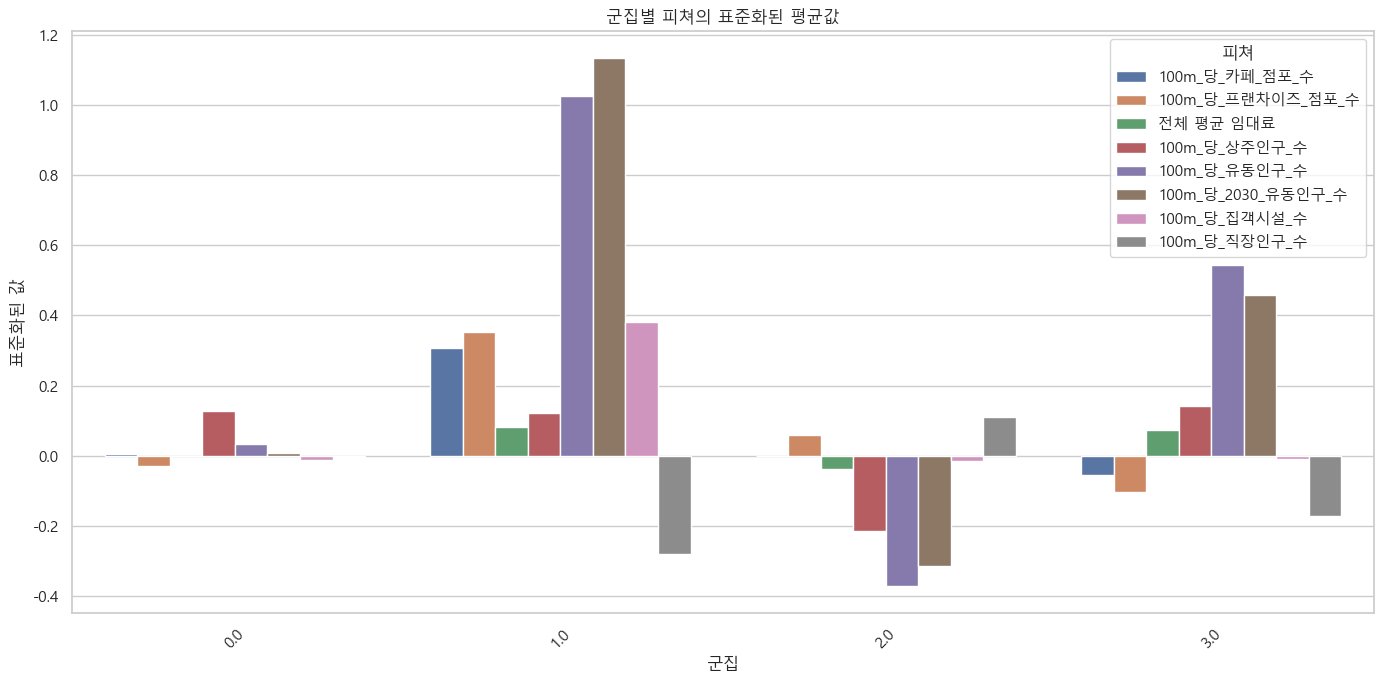

In [5]:
##### 피쳐 한 눈에 보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged[features])

# 표준화된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['군집'] = merged['군집']

# 시각화
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 각 피처에 대해 군집별 평균값을 계산
mean_values = scaled_df.groupby('군집').mean().reset_index()

# 군집별 피쳐의 평균값을 막대그래프로 시각화
mean_values_melted = mean_values.melt(id_vars='군집', var_name='피쳐', value_name='표준화된_값')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시

plt.figure(figsize=(14, 7))
sns.barplot(data=mean_values_melted, x='군집', y='표준화된_값', hue='피쳐')
plt.title('군집별 피쳐의 표준화된 평균값')
plt.xlabel('군집')
plt.ylabel('표준화된 값')
plt.legend(title='피쳐')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
##### 군집별상권 리스트 담기 
merged0 = merged[merged['군집']==0]
merged1 = merged[merged['군집']==1]
merged2 = merged[merged['군집']==2]
merged3 = merged[merged['군집']==3]

sg0 = merged0['상권_코드_명'].tolist()  #군집0 상권리스트 
sg1 = merged1['상권_코드_명'].tolist()  #군집1 상권리스트
sg2 = merged2['상권_코드_명'].tolist()  #군집2 상권리스트
sg3 = merged3['상권_코드_명'].tolist()  #군집3 상권리스트

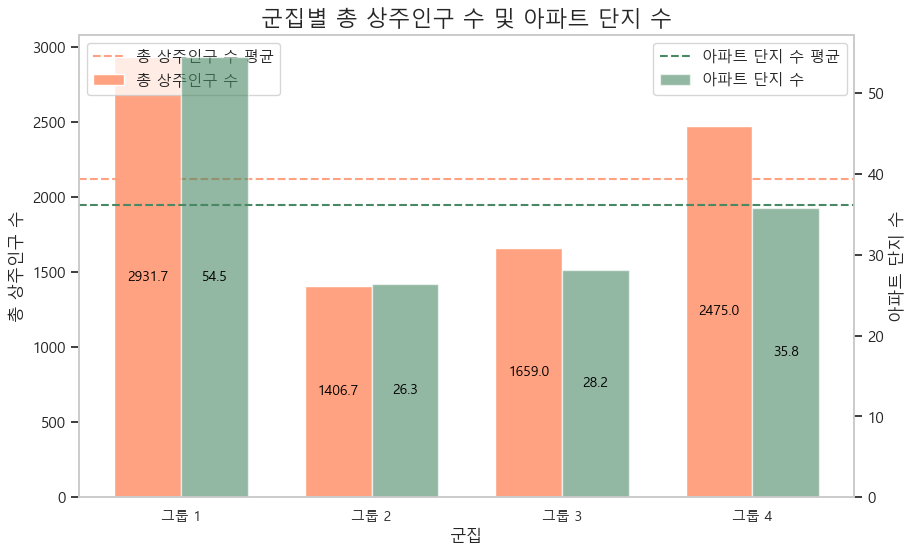

In [30]:
##### 그룹1 - 아파트 단지 수 최다 & 총 상주인구 평균 1위
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)

# 군집별 '총_상주인구_수' 평균을 구함
grouped_population = merged.groupby('군집')['총_상주인구_수'].mean().reset_index()

# 군집별 '아파트_수'를 구함 (예시로 '아파트_수' 열이 있다고 가정)
grouped_apartment = merged.groupby('군집')['아파트_단지_수'].mean().reset_index()

# 막대 너비 설정
bar_width = 0.35
index = np.arange(1, len(grouped_population['군집']) + 1)  # 0,1,2,3 대신 1,2,3,4로 설정

# 시각화를 위해 군집을 x축으로 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 막대그래프 (총 상주인구 수)
bar1 = ax1.bar(index - bar_width/2, grouped_population['총_상주인구_수'], 
               bar_width, color='#FFA281', label='총 상주인구 수')

# 첫 번째 y축 설정
ax1.set_xlabel('군집', fontsize=12)
ax1.set_ylabel('총 상주인구 수', fontsize=12)
ax1.set_title('군집별 총 상주인구 수 및 아파트 단지 수', fontsize=16)

# x축에 그룹1, 2, 3, 4로 표시
ax1.set_xticks(index)
ax1.set_xticklabels([f'그룹 {i}' for i in index], fontsize=10)

# 두 번째 막대그래프 (아파트 수) - 오른쪽 y축
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width/2, grouped_apartment['아파트_단지_수'], 
               bar_width, color='#498864', alpha=0.6, label='아파트 단지 수')

# 오른쪽 y축 레이블 설정
ax2.set_ylabel('아파트 단지 수', fontsize=12)

# 총 상주인구 수와 아파트 단지 수의 전체 평균 구함
total_population_mean = grouped_population['총_상주인구_수'].mean()
total_apartment_mean = grouped_apartment['아파트_단지_수'].mean()

# 세로선으로 평균 표시
ax1.axhline(total_population_mean, color='#FFA281', linestyle='--', linewidth=1.5, label='총 상주인구 수 평균')
ax2.axhline(total_apartment_mean, color='#498864', linestyle='--', linewidth=1.5, label='아파트 단지 수 평균')

# 막대 중간에 값 표시 (총 상주인구 수)
for i, v in enumerate(grouped_population['총_상주인구_수']):
    ax1.text(index[i] - bar_width/2, v / 2, f'{v:.1f}', ha='center', va='center', fontsize=10, color='black')

# 막대 중간에 값 표시 (아파트 단지 수)
for i, v in enumerate(grouped_apartment['아파트_단지_수']):
    ax2.text(index[i] + bar_width/2, v / 2, f'{v:.1f}', ha='center', va='center', fontsize=10, color='black')

# Grid 제거
ax1.grid(False)
ax2.grid(False)

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
#plt.savefig('c:\\data\\group1.png', dpi=300, bbox_inches='tight')
plt.show()

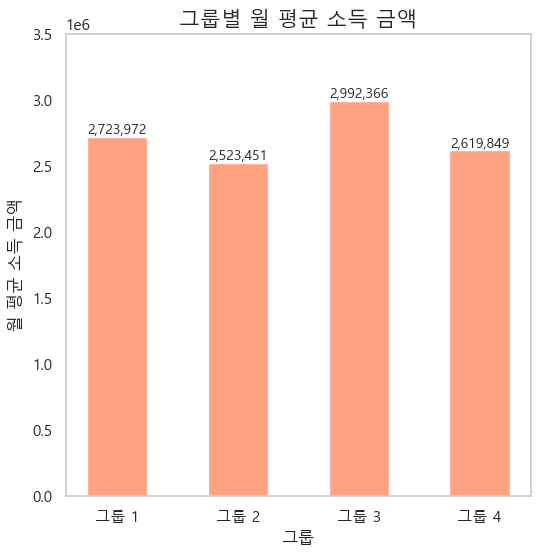

In [31]:
##### 그룹2 - 월 평균 소득 금액
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

# 군집별 '월_평균_소득_금액' 평균 계산
grouped_income = merged.groupby('군집')['월_평균_소득_금액'].mean().reset_index()

plt.figure(figsize=(6,6))

# 막대 그래프 그리기
bars = plt.bar(groups, income_values, color='#FFA281', width=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('그룹별 월 평균 소득 금액', fontsize=15)
plt.xlabel('그룹', fontsize=12)
plt.ylabel('월 평균 소득 금액', fontsize=12)

# y축 범위를 설정 (0에서 3,500,000까지)
plt.ylim(0, 3500000)

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)



# 그래프 표시
plt.grid(False)
#plt.savefig('c:\\data\\group2.png', dpi=300, bbox_inches='tight')
plt.show()

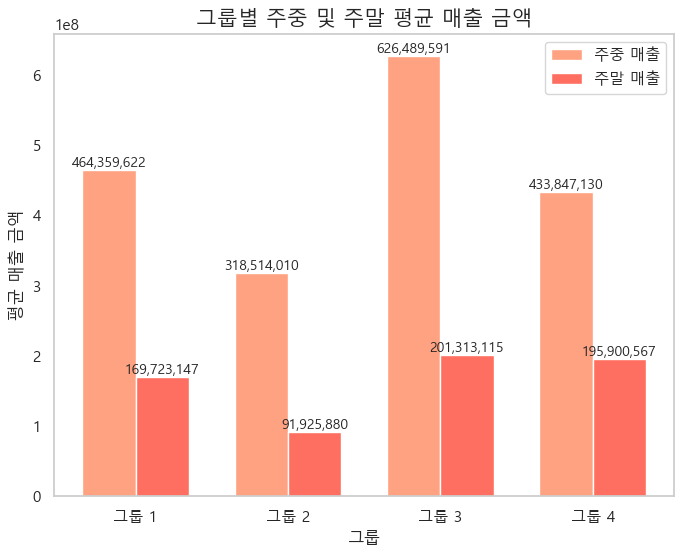

In [32]:
##### 그룹2 - 주중 및 주말 평균 매출 금액
pd.set_option('display.float_format', '{:.2f}'.format)

# 주중 평균 매출 금액
a0 = cafe0['주중_매출_금액'].mean()
a1 = cafe1['주중_매출_금액'].mean()
a2 = cafe2['주중_매출_금액'].mean()
a3 = cafe3['주중_매출_금액'].mean()

# 주말 평균 매출 금액
b0 = cafe0['주말_매출_금액'].mean()
b1 = cafe1['주말_매출_금액'].mean()
b2 = cafe2['주말_매출_금액'].mean()
b3 = cafe3['주말_매출_금액'].mean()

import matplotlib.pyplot as plt
import numpy as np

# 주중 및 주말 평균 매출 금액
weekdays_sales = [a0, a1, a2, a3]  # 주중 매출
weekend_sales = [b0, b1, b2, b3]    # 주말 매출
groups = ['그룹 1', '그룹 2', '그룹 3', '그룹 4']

# x축 위치 설정
x = np.arange(len(groups))

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 막대 그래프 그리기
bar_width = 0.35  # 막대 너비
bars1 = plt.bar(x - bar_width/2, weekdays_sales, width=bar_width, label='주중 매출', color='#FFA281')
bars2 = plt.bar(x + bar_width/2, weekend_sales, width=bar_width, label='주말 매출', color='#FF6F61')

# 그래프 제목 및 축 레이블 설정
plt.title('그룹별 주중 및 주말 평균 매출 금액', fontsize=15)
plt.xlabel('그룹', fontsize=12)
plt.ylabel('평균 매출 금액', fontsize=12)

# x축 눈금 레이블 설정
plt.xticks(x, groups)

# y축에 그리드 추가
plt.grid(axis='y')

# 범례 추가
plt.legend()

# 막대 위에 숫자 표시
for bars in (bars1, bars2):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

# 그래프 표시
plt.grid(False)
#plt.savefig('c:\\data\\group22.png', dpi=300, bbox_inches='tight')
plt.show()


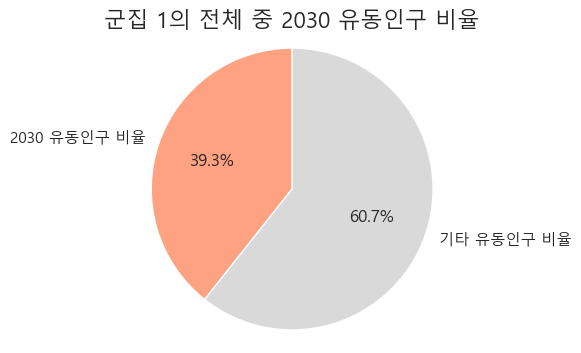

In [46]:
##### 그룹2 - 2030 유동인구 비율
# 군집별로 '전체중2030유동인구비율'의 평균을 계산
merged['2030유동인구'] = merged['연령대_20_유동인구_수'] + merged['연령대_30_유동인구_수']
merged['전체중2030유동인구비율'] = merged['2030유동인구'] / merged['총_유동인구_수']
grouped_ratio = merged.groupby('군집')['전체중2030유동인구비율'].mean().reset_index()

# 군집이 1인 데이터만 필터링
group1_data = merged[merged['군집'] == 1]

# '전체중2030유동인구비율'의 평균 계산
grouped_ratio_1 = group1_data['전체중2030유동인구비율'].mean()

# 데이터 구성 (2030 유동인구 비율과 나머지 비율)
sizes = [grouped_ratio_1, 1 - grouped_ratio_1]
labels = ['2030 유동인구 비율', '기타 유동인구 비율']
colors = ['#FFA281', '#d9d9d9']

# 원형 그래프 그리기
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # 원이 찌그러지지 않도록 함
plt.title('군집 1의 전체 중 2030 유동인구 비율', fontsize=16)

# 그래프 출력
plt.show()


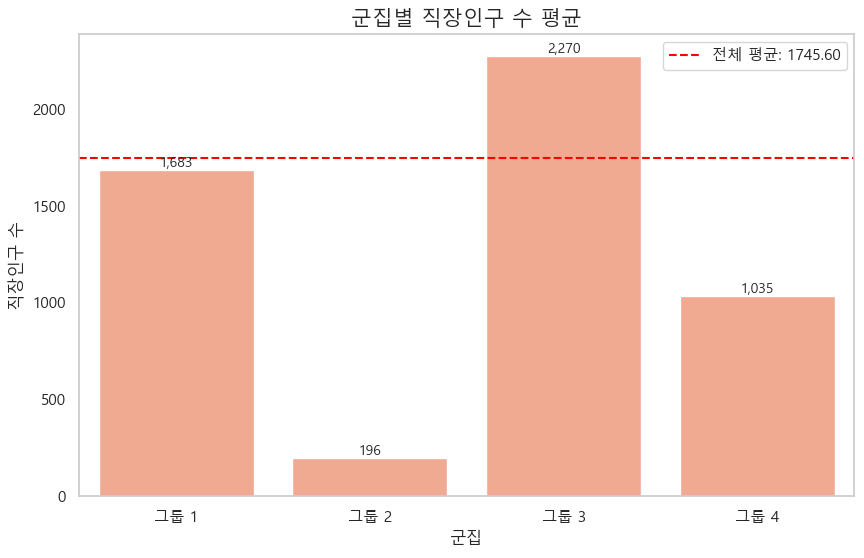

In [27]:
##### 그룹3 - 직장인구 수 평균
import matplotlib.pyplot as plt
import seaborn as sns

# 각 군집별 '총_직장_인구_수'의 평균 계산
grouped_data = merged.groupby('군집')['총_직장_인구_수'].mean().reset_index()

# 군집 번호를 1부터 시작하도록 수정 (그룹 1, 2, 3, 4로 표시)
grouped_data['군집'] = grouped_data['군집'] + 1

# 전체 데이터의 평균 계산
overall_mean = merged['총_직장_인구_수'].mean()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))

# seaborn의 barplot을 사용해 군집별 평균 '총_직장_인구_수' 막대그래프 그리기
bars = sns.barplot(x='군집', y='총_직장_인구_수', data=grouped_data, color='#FFA281')

# 전체 평균을 점선으로 표시
plt.axhline(y=overall_mean, color='red', linestyle='--', label=f'전체 평균: {overall_mean:.2f}')

# 막대 위에 숫자 표시
for bar in bars.patches:
    bar_height = bar.get_height()
    bars.annotate(f'{bar_height:,.0f}', 
                  (bar.get_x() + bar.get_width() / 2, bar_height), 
                  ha='center', va='bottom', fontsize=10)

# x축 레이블을 그룹 1, 2, 3, 4로 설정
plt.xticks(ticks=range(4), labels=['그룹 1', '그룹 2', '그룹 3', '그룹 4'])

# 그래프 제목 및 축 레이블 설정
plt.title('군집별 직장인구 수 평균', fontsize=15)
plt.xlabel('군집', fontsize=12)
plt.ylabel('직장인구 수', fontsize=12)

# 범례 표시
plt.legend()

# 그리드 없애기
plt.grid(False)

# 그래프 표시
plt.show()


In [ ]:
##### 그룹3 - 주중 매출 금액 평균 대비 유동인구 수 평균 비율

In [ ]:
##### 그룹4 - 시간대별 유동인구 수 평균 라인그래프
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
areas_stores = pd.read_csv('c:\\semi\\areas_stores.csv', encoding='cp949')
areas_sells = pd.read_csv('c:\\semi\\areas_sells.csv', encoding='cp949')
areas_moneys = pd.read_csv('c:\\semi\\areas_moneys.csv', encoding='cp949')
areas_changes = pd.read_csv('c:\\semi\\areas_changes.csv', encoding='cp949')
areas_roads = pd.read_csv('c:\\semi\\areas_roads.csv', encoding='cp949')
areas_lives = pd.read_csv('c:\\semi\\areas_lives.csv', encoding='cp949')

# 군집별 데이터 추출
merged0 = merged[merged['군집'] == 0]
merged1 = merged[merged['군집'] == 1]
merged2 = merged[merged['군집'] == 2]
merged3 = merged[merged['군집'] == 3]

# 각 군집의 상권 코드 리스트 생성
sg0 = merged0['상권_코드_명'].tolist()
sg1 = merged1['상권_코드_명'].tolist()
sg2 = merged2['상권_코드_명'].tolist()
sg3 = merged3['상권_코드_명'].tolist()

# 각 군집에 해당하는 도로 데이터 추출
r0 = areas_roads[areas_roads['상권_코드_명'].isin(sg0)]
r1 = areas_roads[areas_roads['상권_코드_명'].isin(sg1)]
r2 = areas_roads[areas_roads['상권_코드_명'].isin(sg2)]
r3 = areas_roads[areas_roads['상권_코드_명'].isin(sg3)]

# 군집별 시간대 별 유동인구 수 평균 계산
r0_avg = [r0['시간대_00_06_유동인구_수'].mean(),
          r0['시간대_06_11_유동인구_수'].mean(),
          r0['시간대_11_14_유동인구_수'].mean(),
          r0['시간대_14_17_유동인구_수'].mean(),
          r0['시간대_17_21_유동인구_수'].mean(),
          r0['시간대_21_24_유동인구_수'].mean()]

r1_avg = [r1['시간대_00_06_유동인구_수'].mean(),
          r1['시간대_06_11_유동인구_수'].mean(),
          r1['시간대_11_14_유동인구_수'].mean(),
          r1['시간대_14_17_유동인구_수'].mean(),
          r1['시간대_17_21_유동인구_수'].mean(),
          r1['시간대_21_24_유동인구_수'].mean()]

r2_avg = [r2['시간대_00_06_유동인구_수'].mean(),
          r2['시간대_06_11_유동인구_수'].mean(),
          r2['시간대_11_14_유동인구_수'].mean(),
          r2['시간대_14_17_유동인구_수'].mean(),
          r2['시간대_17_21_유동인구_수'].mean(),
          r2['시간대_21_24_유동인구_수'].mean()]

r3_avg = [r3['시간대_00_06_유동인구_수'].mean(),
          r3['시간대_06_11_유동인구_수'].mean(),
          r3['시간대_11_14_유동인구_수'].mean(),
          r3['시간대_14_17_유동인구_수'].mean(),
          r3['시간대_17_21_유동인구_수'].mean(),
          r3['시간대_21_24_유동인구_수'].mean()]

# 시간대 라벨
time_labels = ['00:00-06:00', '06:00-11:00', '11:00-14:00', '14:00-17:00', '17:00-21:00', '21:00-24:00']

# 라인 그래프 그리기
plt.figure(figsize=(6,5))

plt.plot(time_labels, r0_avg, label='군집 1', marker='o', color='#686FEA')
plt.plot(time_labels, r1_avg, label='군집 2', marker='o', color='#FFE9D3')
plt.plot(time_labels, r2_avg, label='군집 3', marker='o', color='#39B87F')
plt.plot(time_labels, r3_avg, label='군집 4', marker='o', color='#FF9173')

# 그래프 제목 및 레이블 설정
plt.title('군집 별 시간대 별 유동인구 수 평균', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('유동인구 수 평균', fontsize=12)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend()  # 범례 추가

# 그래프 표시
plt.tight_layout()

# 그래프를 JPG 파일로 저장 (예: 'cluster_population_apartment.jpg')
plt.savefig('c:\\semi\\time_roads.jpg', dpi=300, bbox_inches='tight', format='jpg')

plt.show()

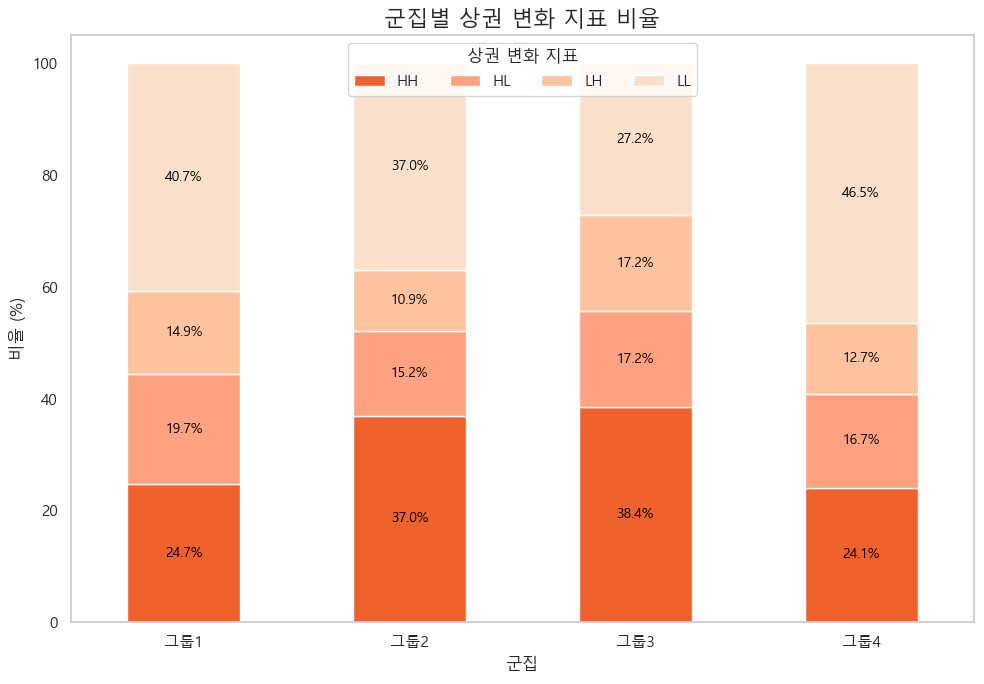

In [41]:
##### 그룹4 - 상권 변화 지표 비율
import pandas as pd
import matplotlib.pyplot as plt

# 상권_변화_지표를 카테고리로 변환
mapping = {'LL': 'LL', 'LH': 'LH', 'HH': 'HH', 'HL': 'HL'}
merged['상권_변화_지표'] = merged['상권_변화_지표'].map(mapping)

# 군집별 상권_변화_지표 비율 계산
grouped = merged.groupby(['군집', '상권_변화_지표']).size().unstack().fillna(0)

# 비율 계산 (백분율)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 색상 설정
colors = ['#EF612D', '#FFA281', '#FFC3A0', '#FAE0CA']  # LL, LH, HL, HH에 해당하는 색상

# 막대그래프 그리기
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

# 그래프 타이틀과 축 라벨 설정
plt.title('군집별 상권 변화 지표 비율', fontsize=16)
plt.xlabel('군집', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)

# x축 라벨 설정
plt.xticks(ticks=range(len(grouped_percentage.index)), labels=['그룹1', '그룹2', '그룹3', '그룹4'], rotation=0)

# 각 군집에 대한 비율 표시
for i in range(grouped_percentage.shape[0]):  # 군집별로 반복
    cumulative_height = 0  # 각 군집의 누적 높이 초기화
    for j, colname in enumerate(grouped_percentage.columns):
        height = grouped_percentage.iloc[i][colname]  # 각 상권 변화 지표의 높이
        cumulative_height += height  # 누적 높이 업데이트
        if height > 0:  # 비율이 0이 아닌 경우에만 텍스트 표시
            ax.text(i, cumulative_height - height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# 범례 설정 (그래프 안에 넣기)
plt.legend(title='상권 변화 지표', bbox_to_anchor=(0.5, 1), loc='upper center', ncol=4)

# 그래프 출력
plt.tight_layout()
plt.grid(False)
#plt.savefig('c:\\data\\상권.png', dpi=300, bbox_inches='tight')
plt.show()


TypeError: can only concatenate tuple (not "list") to tuple

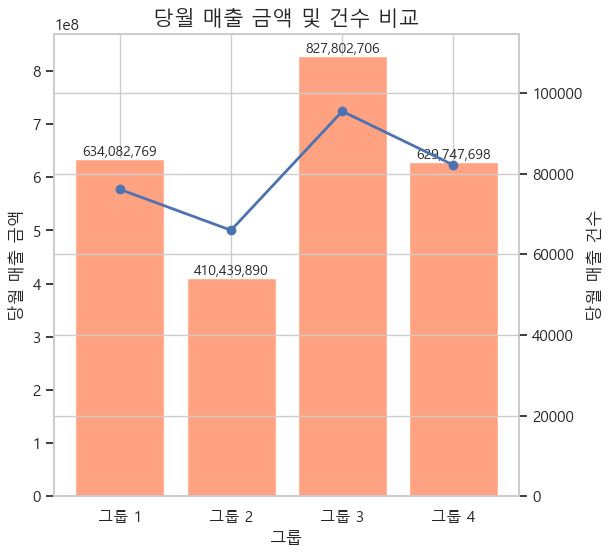

In [39]:
##### 매출1 - 당월 매출 금액 & 건수
import matplotlib.pyplot as plt
import numpy as np
# 당월_매출_금액 평균 
d0 = cafe0['당월_매출_금액'].mean()
d1 = cafe1['당월_매출_금액'].mean()
d2 = cafe2['당월_매출_금액'].mean()
d3 = cafe3['당월_매출_금액'].mean()

# 당월_매출_건수 평균 
e0 = cafe0['당월_매출_건수'].mean()
e1 = cafe1['당월_매출_건수'].mean()
e2 = cafe2['당월_매출_건수'].mean()
e3 = cafe3['당월_매출_건수'].mean()

# 당월 매출 금액 평균
sales_amount = [d0, d1, d2, d3]  # 당월 매출 금액

# 당월 매출 건수 평균
sales_count = [e0, e1, e2, e3]  # 당월 매출 건수
groups = ['그룹 1', '그룹 2', '그룹 3', '그룹 4']

# x축 위치 설정
x = np.arange(len(groups))

# 그래프 크기 설정
plt.figure(figsize=(6, 6))

# 막대 그래프 그리기
bars = plt.bar(x, sales_amount, color='#FFA281', label='당월 매출 금액')

# 그래프 제목 및 축 레이블 설정
plt.title('당월 매출 금액 및 건수 비교', fontsize=15)
plt.xlabel('그룹', fontsize=12)
plt.ylabel('당월 매출 금액', fontsize=12)

# x축 눈금 레이블 설정
plt.xticks(x, groups)

# y축에 그리드 추가
plt.grid(axis='y')

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

# 두 번째 y축 생성
ax2 = plt.gca().twinx()  

# 라인 그래프 그리기
line = ax2.plot(x, sales_count, marker='o', color='b', label='당월 매출 건수', linewidth=2)

# 두 번째 y축 레이블 설정
ax2.set_ylabel('당월 매출 건수', fontsize=12)

# y축 범위 설정 (필요에 따라 조정)
ax2.set_ylim(0, max(sales_count) * 1.2)  # 매출 건수에 맞게 조정

# 범례 표시
lines = bars + line
labels = [b.get_label() for b in lines]
plt.legend(lines, labels, loc='upper left')

# 그래프 표시
plt.grid(False)
#plt.savefig('c:\\data\\금액by건수.png', dpi=300, bbox_inches='tight')
plt.show()

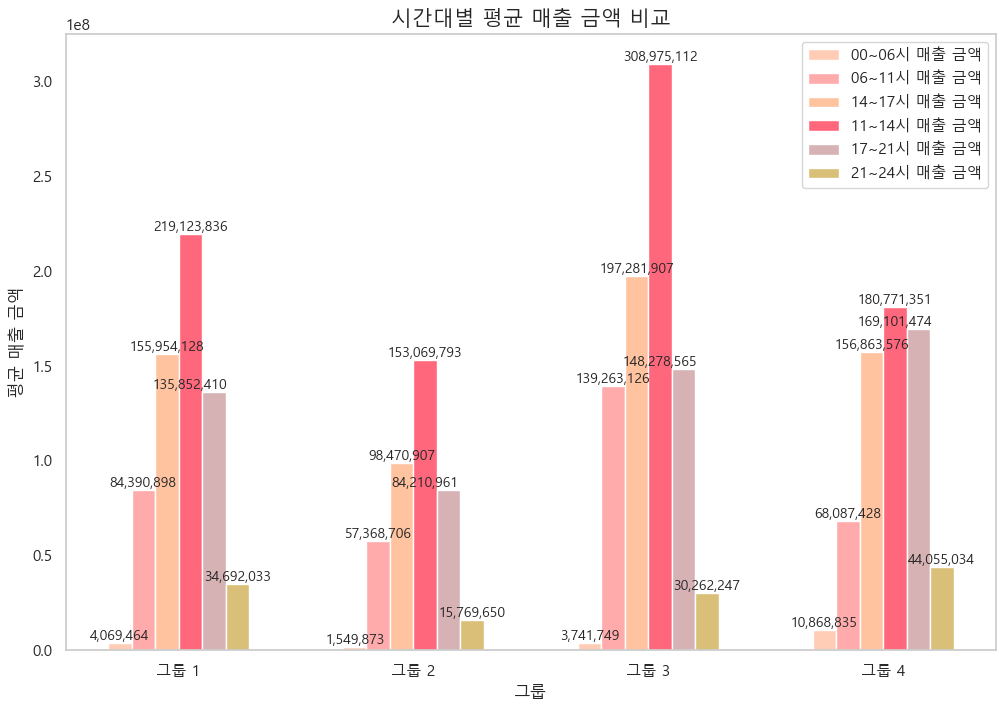

In [38]:
##### 매출2 - 시간대별 평균 매출 금액
import matplotlib.pyplot as plt
import numpy as np

#######시간대별 매출 금액
# '시간대_06~11_매출_금액'
f0 = cafe0['시간대_00~06_매출_금액'].mean()
f1 = cafe1['시간대_00~06_매출_금액'].mean()
f2 = cafe2['시간대_00~06_매출_금액'].mean()
f3 = cafe3['시간대_00~06_매출_금액'].mean()

# 시간대_06~11_매출_금액
g0 = cafe0['시간대_06~11_매출_금액'].mean()
g1 = cafe1['시간대_06~11_매출_금액'].mean()
g2 = cafe2['시간대_06~11_매출_금액'].mean()
g3 = cafe3['시간대_06~11_매출_금액'].mean()

# 시간대_11~14_매출_금액
h0 = cafe0['시간대_11~14_매출_금액'].mean()
h1 = cafe1['시간대_11~14_매출_금액'].mean()
h2 = cafe2['시간대_11~14_매출_금액'].mean()
h3 = cafe3['시간대_11~14_매출_금액'].mean()

# 시간대_14~17_매출_금액
i0 = cafe0['시간대_14~17_매출_금액'].mean()
i1 = cafe1['시간대_14~17_매출_금액'].mean()
i2 = cafe2['시간대_14~17_매출_금액'].mean()
i3 = cafe3['시간대_14~17_매출_금액'].mean()

# 시간대_17~21_매출_금액
j0 = cafe0['시간대_17~21_매출_금액'].mean()
j1 = cafe1['시간대_17~21_매출_금액'].mean()
j2 = cafe2['시간대_17~21_매출_금액'].mean()
j3 = cafe3['시간대_17~21_매출_금액'].mean()

# 시간대_21~24_매출_금액
k0 = cafe0['시간대_21~24_매출_금액'].mean()
k1 = cafe1['시간대_21~24_매출_금액'].mean()
k2 = cafe2['시간대_21~24_매출_금액'].mean()
k3 = cafe3['시간대_21~24_매출_금액'].mean()


# 각 시간대별 평균 매출 금액
sales_00_06 = [f0, f1, f2, f3]  # 시간대 00~06 매출 금액
sales_06_11 = [g0, g1, g2, g3]  # 시간대 06~11 매출 금액
sales_11_14 = [h0, h1, h2, h3]  # 시간대 11~14 매출 금액
sales_14_17 = [i0, i1, i2, i3]  # 시간대 14~17 매출 금액
sales_17_21 = [j0, j1, j2, j3]  # 시간대 17~21 매출 금액
sales_21_24 = [k0, k1, k2, k3]  # 시간대 21~24 매출 금액

# 그룹 설정
groups = ['그룹 1', '그룹 2', '그룹 3', '그룹 4']
x = np.arange(len(groups))

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 각 시간대별 막대 그래프 그리기
bar_width = 0.1  # 막대 너비
plt.bar(x - 2.5 * bar_width, sales_00_06, width=bar_width, label='00~06시 매출 금액', color='#FFCCB6')  # 밝은 색상
plt.bar(x - 1.5 * bar_width, sales_06_11, width=bar_width, label='06~11시 매출 금액', color='#FFABAB')  # 밝은 색상
plt.bar(x - 0.5 * bar_width, sales_14_17, width=bar_width, label='14~17시 매출 금액', color='#FFC3A0')  # 밝은 색상 (변경된 색상)
plt.bar(x + 0.5 * bar_width, sales_11_14, width=bar_width, label='11~14시 매출 금액', color='#FF677D')  # 밝은 색상 (변경된 색상)
plt.bar(x + 1.5 * bar_width, sales_17_21, width=bar_width, label='17~21시 매출 금액', color='#D7B2B5')  # 밝은 색상
plt.bar(x + 2.5 * bar_width, sales_21_24, width=bar_width, label='21~24시 매출 금액', color='#D9BF77')  # 밝은 색상

# 그래프 제목 및 축 레이블 설정
plt.title('시간대별 평균 매출 금액 비교', fontsize=15)
plt.xlabel('그룹', fontsize=12)
plt.ylabel('평균 매출 금액', fontsize=12)

# x축 눈금 레이블 설정
plt.xticks(x, groups)

# y축에 그리드 추가
plt.grid(axis='y')

# 막대 위에 숫자 표시
for i in range(len(groups)):
    plt.text(x[i] - 2.5 * bar_width, sales_00_06[i], f'{sales_00_06[i]:,.0f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] - 1.5 * bar_width, sales_06_11[i], f'{sales_06_11[i]:,.0f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] - 0.5 * bar_width, sales_14_17[i], f'{sales_14_17[i]:,.0f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + 0.5 * bar_width, sales_11_14[i], f'{sales_11_14[i]:,.0f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + 0.5 * bar_width, sales_17_21[i], f'{sales_17_21[i]:,.0f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + 2.5 * bar_width, sales_21_24[i], f'{sales_21_24[i]:,.0f}', ha='center', va='bottom', fontsize=10)

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(False)
#plt.savefig('c:\\data\\매출1.png', dpi=300, bbox_inches='tight')
plt.show()

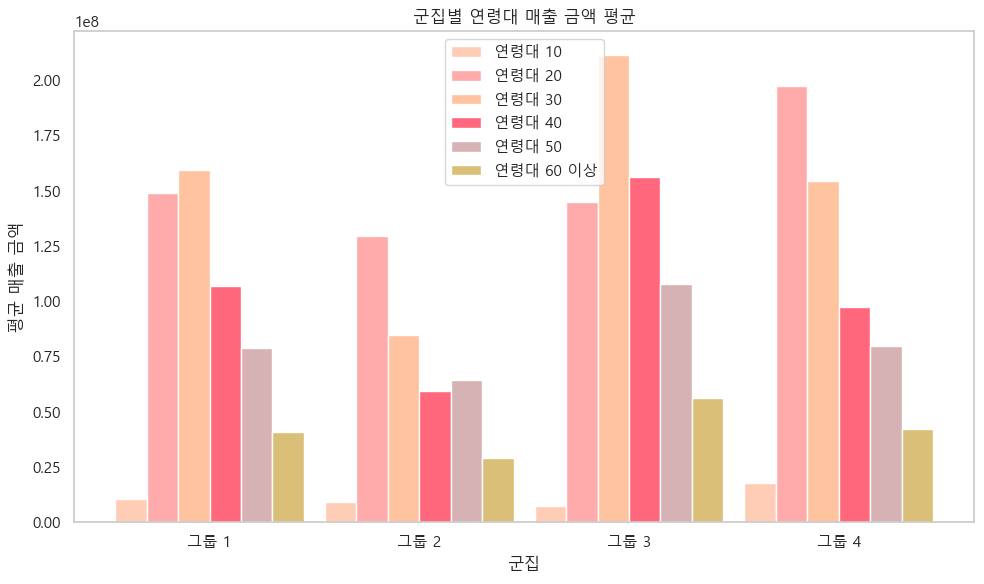

In [40]:
##### 매출3 - 연령대별 평균 매출 금액
import matplotlib.pyplot as plt
import numpy as np

# 각 군집의 연령대별 매출 평균 데이터
l0 = cafe0['연령대_10_매출_금액'].mean()
l1 = cafe1['연령대_10_매출_금액'].mean()
l2 = cafe2['연령대_10_매출_금액'].mean()
l3 = cafe3['연령대_10_매출_금액'].mean()

m0 = cafe0['연령대_20_매출_금액'].mean()
m1 = cafe1['연령대_20_매출_금액'].mean()
m2 = cafe2['연령대_20_매출_금액'].mean()
m3 = cafe3['연령대_20_매출_금액'].mean()

n0 = cafe0['연령대_30_매출_금액'].mean()
n1 = cafe1['연령대_30_매출_금액'].mean()
n2 = cafe2['연령대_30_매출_금액'].mean()
n3 = cafe3['연령대_30_매출_금액'].mean()

o0 = cafe0['연령대_40_매출_금액'].mean()
o1 = cafe1['연령대_40_매출_금액'].mean()
o2 = cafe2['연령대_40_매출_금액'].mean()
o3 = cafe3['연령대_40_매출_금액'].mean()

p0 = cafe0['연령대_50_매출_금액'].mean()
p1 = cafe1['연령대_50_매출_금액'].mean()
p2 = cafe2['연령대_50_매출_금액'].mean()
p3 = cafe3['연령대_50_매출_금액'].mean()

q0 = cafe0['연령대_60_이상_매출_금액'].mean()
q1 = cafe1['연령대_60_이상_매출_금액'].mean()
q2 = cafe2['연령대_60_이상_매출_금액'].mean()
q3 = cafe3['연령대_60_이상_매출_금액'].mean()

# 각 군집의 연령대별 매출 평균 데이터
age_groups = ['연령대_10', '연령대_20', '연령대_30', '연령대_40', '연령대_50', '연령대_60 이상']
groups = ['군집1', '군집2', '군집3', '군집4']

# 군집별 연령대 매출 평균 데이터
data = {
    '연령대_10': [l0, l1, l2, l3],
    '연령대_20': [m0, m1, m2, m3],
    '연령대_30': [n0, n1, n2, n3],
    '연령대_40': [o0, o1, o2, o3],
    '연령대_50': [p0, p1, p2, p3],
    '연령대_60 이상': [q0, q1, q2, q3]
}

# 막대 그래프 설정
x = np.arange(len(groups))  # 군집별 위치
width = 0.15  # 막대의 너비

fig, ax = plt.subplots(figsize=(10, 6))

# 연령대별 막대 그래프 생성 (지정한 색상 사용)
rects1 = ax.bar(x - width*2.5, data['연령대_10'], width, label='연령대 10', color='#FFCCB6')
rects2 = ax.bar(x - width*1.5, data['연령대_20'], width, label='연령대 20', color='#FFABAB')
rects3 = ax.bar(x - width*0.5, data['연령대_30'], width, label='연령대 30', color='#FFC3A0')
rects4 = ax.bar(x + width*0.5, data['연령대_40'], width, label='연령대 40', color='#FF677D')
rects5 = ax.bar(x + width*1.5, data['연령대_50'], width, label='연령대 50', color='#D7B2B5')
rects6 = ax.bar(x + width*2.5, data['연령대_60 이상'], width, label='연령대 60 이상', color='#D9BF77')

# 그래프 레이블, 제목 추가
ax.set_xlabel('군집')
ax.set_ylabel('평균 매출 금액')
ax.set_title('군집별 연령대 매출 금액 평균')
ax.set_xticks(x)
ax.set_xticklabels([f'그룹 {i+1}' for i in range(len(total_sales))])  # 그룹 1부터 시작

# 범례를 그래프 안쪽에 위치 (오른쪽 상단)
ax.legend(loc='upper center')

# 그래프 표시
plt.tight_layout()
plt.grid(False)
plt.savefig('c:\\data\\연령대_매출금액_평균.png', dpi=300, bbox_inches='tight')
plt.show()


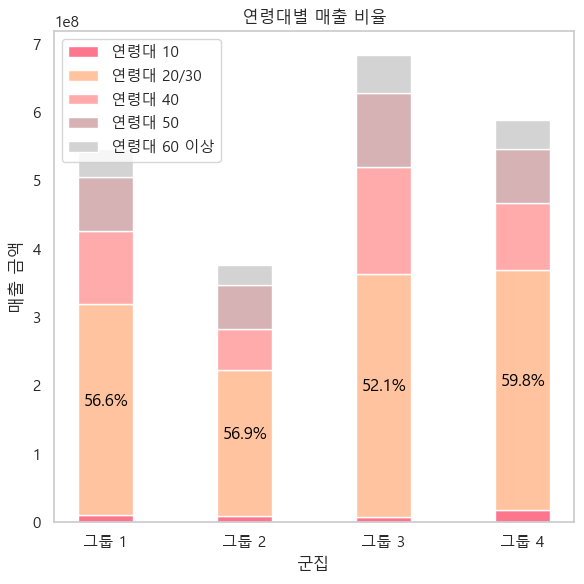

In [35]:
##### 매출4 - 2030 매출 비율
import matplotlib.pyplot as plt
import numpy as np

# 각 군집의 연령대별 매출 평균 데이터
l0 = cafe0['연령대_10_매출_금액'].mean()
l1 = cafe1['연령대_10_매출_금액'].mean()
l2 = cafe2['연령대_10_매출_금액'].mean()
l3 = cafe3['연령대_10_매출_금액'].mean()

m0 = cafe0['연령대_20_매출_금액'].mean()
m1 = cafe1['연령대_20_매출_금액'].mean()
m2 = cafe2['연령대_20_매출_금액'].mean()
m3 = cafe3['연령대_20_매출_금액'].mean()

n0 = cafe0['연령대_30_매출_금액'].mean()
n1 = cafe1['연령대_30_매출_금액'].mean()
n2 = cafe2['연령대_30_매출_금액'].mean()
n3 = cafe3['연령대_30_매출_금액'].mean()

o0 = cafe0['연령대_40_매출_금액'].mean()
o1 = cafe1['연령대_40_매출_금액'].mean()
o2 = cafe2['연령대_40_매출_금액'].mean()
o3 = cafe3['연령대_40_매출_금액'].mean()

p0 = cafe0['연령대_50_매출_금액'].mean()
p1 = cafe1['연령대_50_매출_금액'].mean()
p2 = cafe2['연령대_50_매출_금액'].mean()
p3 = cafe3['연령대_50_매출_금액'].mean()

q0 = cafe0['연령대_60_이상_매출_금액'].mean()
q1 = cafe1['연령대_60_이상_매출_금액'].mean()
q2 = cafe2['연령대_60_이상_매출_금액'].mean()
q3 = cafe3['연령대_60_이상_매출_금액'].mean()

# 각 군집의 연령대별 매출 데이터를 배열로 정의
data = np.array([
    [l0, m0 + n0, o0, p0, q0],  # 군집 0 (20대와 30대 합침)
    [l1, m1 + n1, o1, p1, q1],  # 군집 1
    [l2, m2 + n2, o2, p2, q2],  # 군집 2
    [l3, m3 + n3, o3, p3, q3]   # 군집 3
])

# 군집별 총 매출 계산
total_sales = data.sum(axis=1)  # 각 군집별 총 매출

# 누적 막대 그래프 설정
fig, ax = plt.subplots(figsize=(6, 6))

# 연령대별 막대 그래프 데이터 준비
age_labels = ['연령대 10', '연령대 20/30', '연령대 40', '연령대 50', '연령대 60 이상']
bar_positions = np.arange(len(total_sales))  # 군집 위치
bar_width = 0.4  # 막대 너비

# 각 군집의 가로 막대 그래프 생성 (지정된 색상 사용)
ax.bar(bar_positions, data[:, 0], width=bar_width, label='연령대 10', color='#fd768e')
ax.bar(bar_positions, data[:, 1], width=bar_width, bottom=data[:, 0], label='연령대 20/30', color='#FFC3A0')
ax.bar(bar_positions, data[:, 2], width=bar_width, bottom=data[:, 0] + data[:, 1], label='연령대 40', color='#FFABAB')
ax.bar(bar_positions, data[:, 3], width=bar_width, bottom=data[:, 0] + data[:, 1] + data[:, 2], label='연령대 50', color='#D7B2B5')
ax.bar(bar_positions, data[:, 4], width=bar_width, bottom=data[:, 0] + data[:, 1] + data[:, 2] + data[:, 3], label='연령대 60 이상', color='lightgray')

# 그래프 레이블, 제목 추가
ax.set_xlabel('군집')
ax.set_ylabel('매출 금액')
ax.set_title('연령대별 매출 비율')

# x축 레이블 설정
ax.set_xticks(bar_positions)
ax.set_xticklabels([f'그룹 {i+1}' for i in range(len(total_sales))])  # 그룹 1부터 시작

# 20대와 30대 매출 금액 비율 표시
for i in range(len(total_sales)):
    age_20_30_sales = data[i, 1]
    percentage = (age_20_30_sales / total_sales[i]) * 100  # 비율 계산
    ax.text(i, data[i, 0] + age_20_30_sales / 2, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# 범례 추가
ax.legend(title='연령대')
ax.legend(loc='upper left')

# 그리드 제거
ax.grid(False)

# 그래프 표시
plt.tight_layout()

plt.show()